In [ ]:
import numpy as np       # Library for number operations
import pandas as pd      # Library for data operations
import seaborn as sns  #For Ploting Graphs
import matplotlib.pyplot as plt #For Ploting charts
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers
import h5py
#Importing important libraries

file_path = 'Signal.csv'
df = pd.read_csv(file_path)
print(df.head())

   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

In [ ]:
# Shape and size
print("\nShape:",df.shape)
print("\nColumns:",df.shape[0])
print("\nRows:",df.shape[1])
print("\nSize:",df.size)


Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


In [ ]:
# Null/NA values detection

print("\nNA Values:\n",df.isna().sum())


NA Values:
 Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


Since the dataframe seems clean lean here as the data is complete with numeric values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
CORRELATION=df.corr()
CORRELATION

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


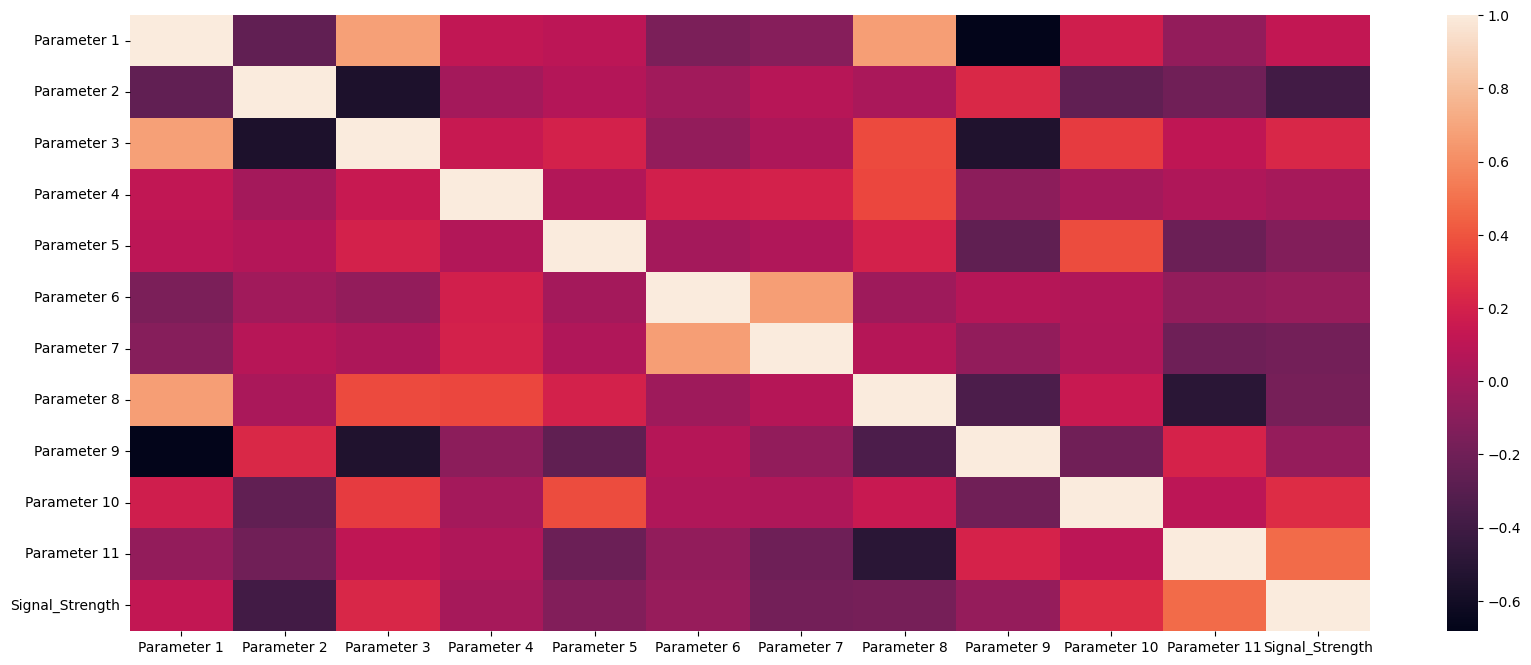

In [ ]:
plt.subplots(figsize=(20,8))
sns.heatmap(CORRELATION)
plt.show()

[0.07676119 0.09822198 0.08064973 0.0786505  0.07541361 0.07478449
 0.10173221 0.08488945 0.07447712 0.10531132 0.1491084 ]


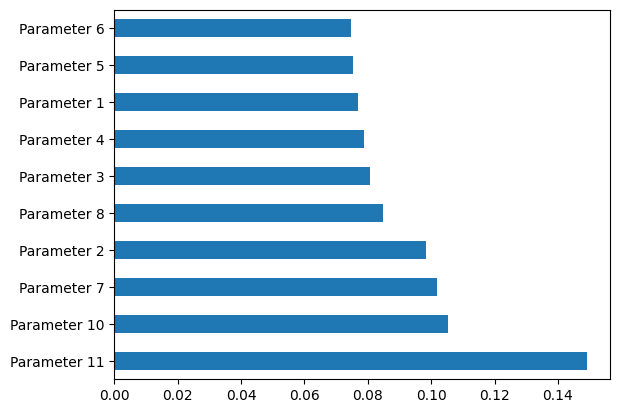

In [ ]:
# Feature Importance

X=df.drop('Signal_Strength',axis=1)       # Independent variables
Y=df['Signal_Strength']                   # Target variable


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Observation: Most effective: Parameter 11**

---



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X=df.drop('Signal_Strength',axis=1)   # Independent variables
Y=df['Signal_Strength']               # Target variable

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

from sklearn.preprocessing import StandardScaler

X_Train_S = StandardScaler().fit_transform(X_Train)   # Scale train data
X_Test_S = StandardScaler().fit_transform(X_Test)     # Scale test data

# Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [ ]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH=400
Network_Classifier=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.0000e+00 - loss: 5.6281 - val_accuracy: 0.0000e+00 - val_loss: 5.6244
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 5.5722 - val_accuracy: 0.0000e+00 - val_loss: 5.5915
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 5.5449 - val_accuracy: 0.0000e+00 - val_loss: 5.5184
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 5.4754 - val_accuracy: 0.0000e+00 - val_loss: 5.3538
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 5.2961 - val_accuracy: 0.0000e+00 - val_loss: 4.9949
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 4.8342 - val_accuracy: 0.0000e+00 - val_loss: 4.2464
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 3.9569 - val_accuracy: 0.0000e+00 - val_loss: 2.8432
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 

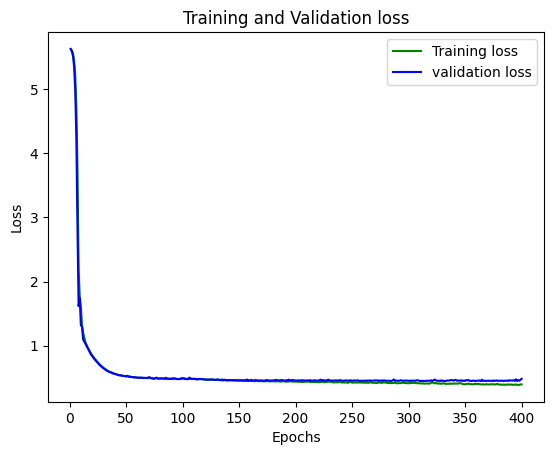

In [ ]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

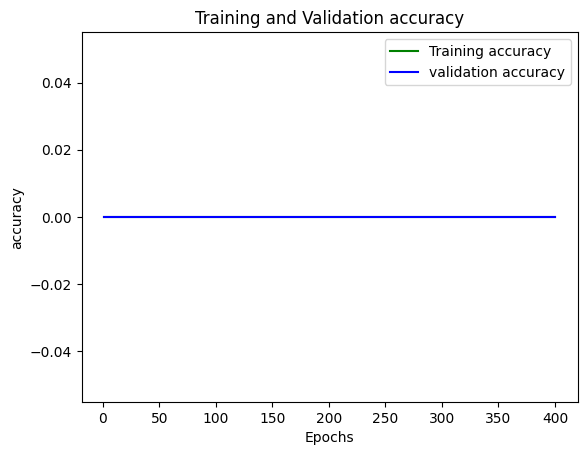

In [ ]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,(EPOCH+1))
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Regressor.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Regressor.save_weights("Classifier1_.weights.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier1_.weights.h5")
print("Loaded model from disk")

# Evaluate the loaded model as a regressor, consistent with its architecture and original training
loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[0], ((score[1]*100))))
print("%s: %.2f%%" % (loaded_model.metrics_names[1], (100-(score[0]*100))))


Saved model to disk
Loaded model from disk
loss: 0.00%
compile_metrics: 51.61%


In [ ]:
NN_model_Regressor2 = Sequential()

# The Input Layer :
NN_model_Regressor2.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor2.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor2.add(Dense(64, kernel_initializer='glorot_uniform'))
NN_model_Regressor2.add(Dense(32, kernel_initializer='glorot_uniform'))
NN_model_Regressor2.add(Dense(256, kernel_initializer='normal'))
NN_model_Regressor2.add(Dense(128, kernel_initializer='glorot_uniform'))
NN_model_Regressor2.add(Dense(128, kernel_initializer='random_normal'))
NN_model_Regressor2.add(Dense(16, kernel_initializer='random_normal'))
NN_model_Regressor2.add(Dense(32, kernel_initializer='he_uniform'))
NN_model_Regressor2.add(Dense(32, kernel_initializer='random_normal'))
NN_model_Regressor2.add(Dense(64, kernel_initializer='he_uniform'))

# The Output Layer :
NN_model_Regressor2.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor2.add(LeakyReLU(alpha=0.1))
NN_model_Regressor2.add(Dense(64, kernel_initializer='he_uniform'))
NN_model_Regressor2.add(Dense(128, kernel_initializer='glorot_uniform'))
# Compile the network :
NN_model_Regressor2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,177 (344.44 KB)

 Trainable params: 88,177 (344.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH=400
Network_Classifier2=NN_model_Regressor2.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.0000e+00 - loss: 5.6157 - val_accuracy: 0.0000e+00 - val_loss: 5.6229
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 5.5768 - val_accuracy: 0.0000e+00 - val_loss: 5.3598
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 4.9943 - val_accuracy: 0.0000e+00 - val_loss: 3.7703
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 3.5445 - val_accuracy: 0.0000e+00 - val_loss: 2.8101
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 2.4815 - val_accuracy: 0.0000e+00 - val_loss: 1.7772
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.6673 - val_accuracy: 0.0000e+00 - val_loss: 1.3371
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 1.2429 - val_accuracy: 0.0000e+00 - val_loss: 0.9897
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy:

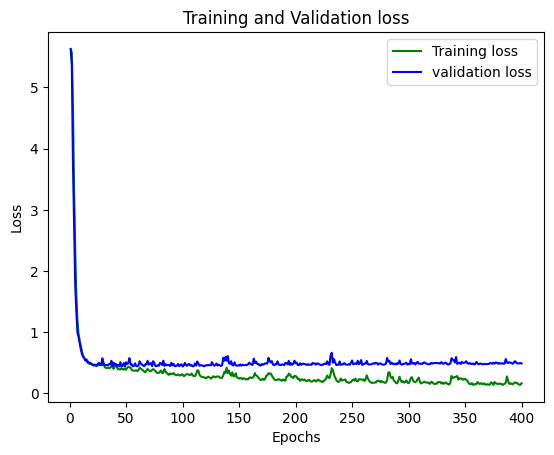

In [ ]:
loss_train = Network_Classifier2.history['loss']
loss_val = Network_Classifier2.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

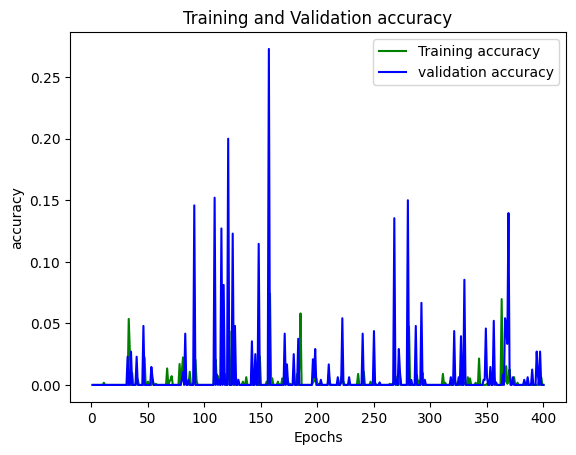

In [ ]:
Acc_train = Network_Classifier2.history['accuracy']
Acc_val = Network_Classifier2.history['val_accuracy']
epochs = range(1,(EPOCH+1))
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Regressor2.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Regressor2.save_weights("Classifier_.weights.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_.weights.h5")
print("Loaded model from disk")

# Evaluate the loaded model as a regressor, consistent with its architecture and original training
loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], ((score[1]*100))))


Saved model to disk


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 238 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded model from disk
compile_metrics: 0.00%


In [ ]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

NN_model_Regressor3 = Sequential()

# Input layer + first hidden layer
# The Input Layer :
NN_model_Regressor3.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor3.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor3.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor3.add(LeakyReLU(alpha=0.1))

NN_model_Regressor3.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor3.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor3.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax


# Compile the model
optimizer = optimizers.Adam(learning_rate=1e-3)
#NN_model_Regressor3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

#NN_model_Regressor3.summary()
# Compile the network :
NN_model_Regressor3.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['accuracy'])
NN_model_Regressor3.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_43 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,553 (49.04 KB)

 Trainable params: 12,553 (49.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH=500
Network_Regressor3=NN_model_Regressor3.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=100)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3286 - loss: 5.5357 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3246 - loss: 5.4925 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3382 - loss: 5.5179 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3426 - loss: 5.5394 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3235 - loss: 5.5499 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3274 - loss: 5.5067 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3385 - loss: 5.5032 - val_accuracy: 0.3479 - val_loss: 5.5306
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3163 - loss: 5.5187 - val_accuracy: 0.

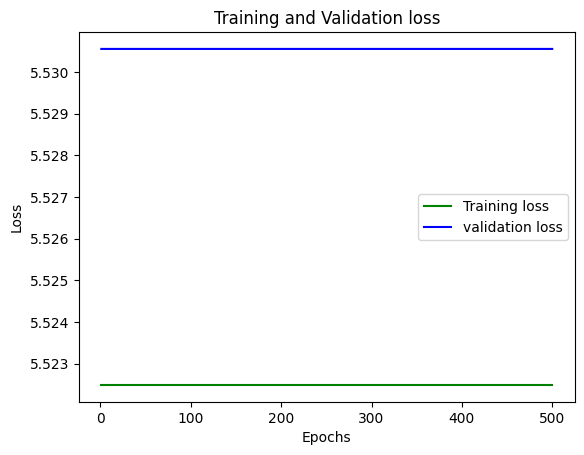

In [ ]:
loss_train = Network_Regressor3.history['loss']
loss_val = Network_Regressor3.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

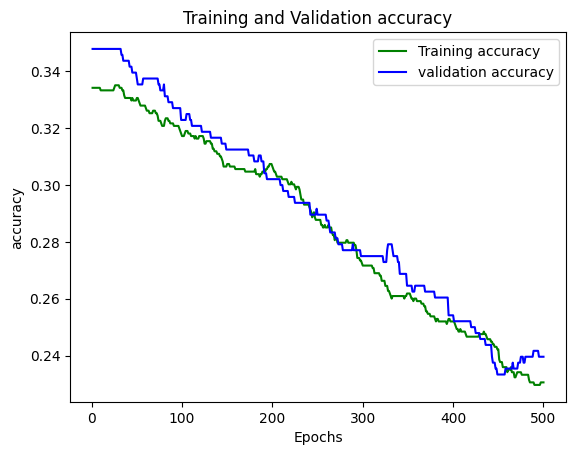

In [ ]:
Acc_train = Network_Regressor3.history['accuracy']
Acc_val = Network_Regressor3.history['val_accuracy']
epochs = range(1,(EPOCH+1))
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Regressor3.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Regressor3.save_weights("Classifier_.weights.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_.weights.h5")
print("Loaded model from disk")

# Evaluate the loaded model as a regressor, consistent with its architecture and original training
loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], ((score[1]*100))))

Saved model to disk
Loaded model from disk
compile_metrics: 23.96%


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
acc: 23.96%

In [ ]:
# Open the file as readonly
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [ ]:
y_train[:1]

array([2], dtype=uint8)

In [ ]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [ ]:
y_test[:1]

array([1], dtype=uint8)

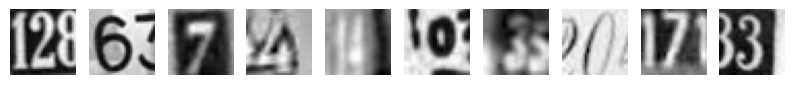

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
y_train.shape

(42000,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1]
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


In [ ]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# build the model
model = nn_model()


In [ ]:
# Compile model
sgd = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)


Epoch 1/100
140/140 - 5s - 37ms/step - accuracy: 0.1031 - loss: 2.3058 - val_accuracy: 0.1127 - val_loss: 2.2911
Epoch 2/100
140/140 - 3s - 18ms/step - accuracy: 0.1679 - loss: 2.1989 - val_accuracy: 0.2454 - val_loss: 2.0576
Epoch 3/100
140/140 - 4s - 28ms/step - accuracy: 0.2990 - loss: 1.9412 - val_accuracy: 0.3631 - val_loss: 1.7760
Epoch 4/100
140/140 - 3s - 19ms/step - accuracy: 0.4056 - loss: 1.7049 - val_accuracy: 0.4599 - val_loss: 1.5715
Epoch 5/100
140/140 - 3s - 18ms/step - accuracy: 0.5027 - loss: 1.4824 - val_accuracy: 0.5498 - val_loss: 1.3595
Epoch 6/100
140/140 - 3s - 19ms/step - accuracy: 0.5584 - loss: 1.3398 - val_accuracy: 0.5854 - val_loss: 1.2854
Epoch 7/100
140/140 - 3s - 19ms/step - accuracy: 0.5962 - loss: 1.2557 - val_accuracy: 0.6136 - val_loss: 1.2232
Epoch 8/100
140/140 - 4s - 25ms/step - accuracy: 0.6140 - loss: 1.2140 - val_accuracy: 0.6366 - val_loss: 1.1637
Epoch 9/100
140/140 - 3s - 19ms/step - accuracy: 0.6360 - loss: 1.1637 - val_accuracy: 0.6321 - 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0]*100)
print("Accuracy:", scores[1]*100)

Loss: 66.72742962837219
Accuracy: 81.12221956253052


Text(0.5, 1.0, 'Training and validation loss')

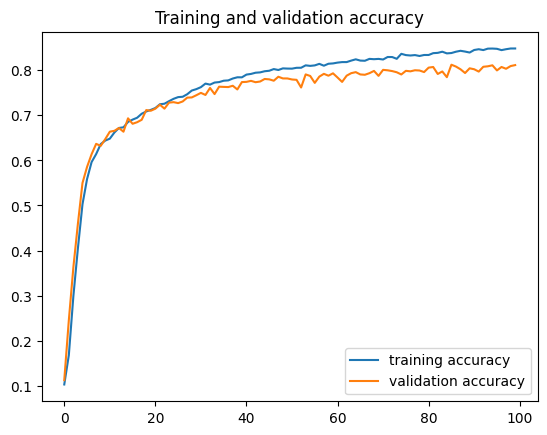

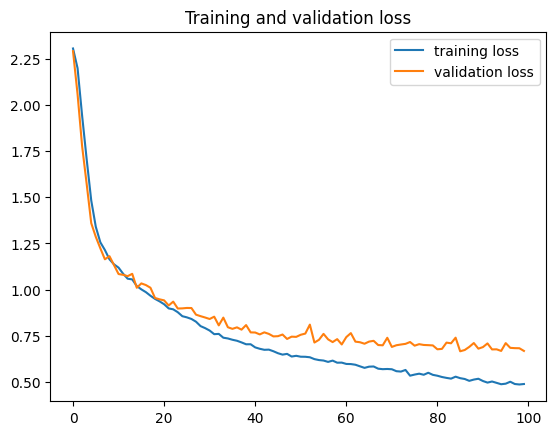

In [ ]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 81.22%.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.